# Twitter Sentiment Analysis

- Download kaggle libraries


In [1]:
#installing kaggle library

! pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import Twitter Sentiment dataset

In [3]:

! unzip "Twitter.zip"

Archive:  Twitter.zip
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### Download require libraries


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer


In [5]:
import nltk

nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvintung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
url = "training.1600000.processed.noemoticon.csv"

df=pd.read_csv(url,delimiter=',',encoding='ISO-8859-1')

df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Rename the columns name

- target
- ids
- date
- flag
- user
- text

In [7]:
#Rename the columns name

column_names= ['target','ids','date','flag','user','text']

df=pd.read_csv(url,names=column_names,encoding='ISO-8859-1')

df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
#Check the shape

df.shape

(1600000, 6)

In [9]:
#Check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
#Check null values

df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
#Checking the distribution of target column

df['target'].value_counts()




target
0    800000
4    800000
Name: count, dtype: int64

### Convert 4 to 1

In [12]:
df['target']=df['target'].replace({4:1})

df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Text(0, 0.5, 'Count')

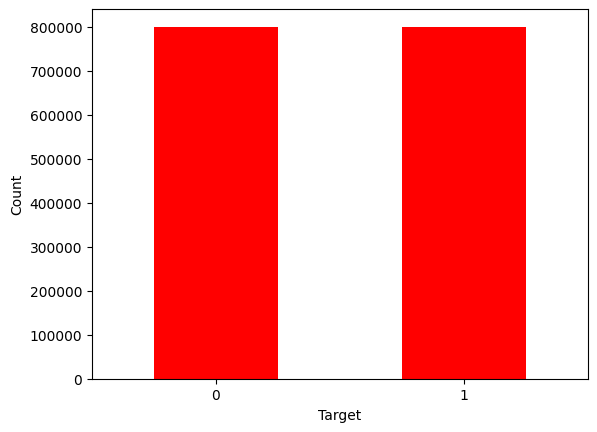

In [13]:
df['target'].value_counts().plot.bar(color='red')
plt.xticks(rotation=360)
plt.xlabel('Target')
plt.ylabel('Count')

### Check the target value 0 is what feedback and 1 is what feedback

In [14]:
df_zero= df.copy()

df_zero=df_zero[df_zero['target']==0]['text']


combined_text_zero = " ".join(df_zero)

blob_zero=TextBlob(combined_text_zero)

blob_zero.sentiment


Sentiment(polarity=-0.0016855566010777385, subjectivity=0.5545490242334319)

Since the polarity is less than 0 so that we can say that target 0 is negative feedback

In [15]:
df_one= df.copy()

df_one=df_one[df_one['target']==1]['text']


combined_text_one = " ".join(df_one)

blob_one=TextBlob(combined_text_one)

blob_one.sentiment



Sentiment(polarity=0.2970503523181284, subjectivity=0.5566945107777646)

In [16]:
stemmer=PorterStemmer()

Since the polarity is more than 0 so that we can say that target 1 is positive feedback

In conclusion, we can say that target 0 is negative and target 1 is positive

In [ ]:
#only keep the alpahabet

#def stemming(content):
   # stemmed_content=re.sub('[^a-zA-Z]'," ",content)
    #stemmed_content=stemmed_content.lower().split()
    #stemmed_content=[stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #stemmed_content=' '.join(stemmed_content)
    
    #return stemmed_content

#df['stemmed_content']=df['text'].apply(stemming)  #50 minutes to be processed
    


KeyboardInterrupt: 

Another way to shorter the processing time try this code

In [17]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Initialize stopwords
stop_words = set(stopwords.words('english'))

def stemming(content):
    try:
        port_stem = PorterStemmer()  # Instantiate inside the function
        stemmed_content = re.sub('[^a-zA-Z]', ' ', content).lower()
        return ' '.join(port_stem.stem(word) for word in stemmed_content.split() if word not in stop_words)
    except Exception as e:
        print(f"Error processing content: {content}. Error: {e}")
        return ""  # Return an empty string on error

def process_data(df):
    with ThreadPoolExecutor() as executor:
        return list(tqdm(executor.map(stemming, df['text']), total=len(df)))

# Process the DataFrame in chunks
chunk_size = 50000  # Adjust based on your memory capacity
num_chunks = len(df) // chunk_size + 1
stemmed_contents = []

for i in tqdm(range(num_chunks)):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(df))
    chunk = df.iloc[start:end]
    stemmed_chunk = process_data(chunk)
    stemmed_contents.extend(stemmed_chunk)

# Add the stemmed content back to the DataFrame
df['stemmed_content'] = stemmed_contents



100%|██████████| 50000/50000 [00:00<00:00, 1069288.11it/s]
0it [00:00, ?it/s]2/33 [01:32<00:02,  2.97s/it]
100%|██████████| 33/33 [01:32<00:00,  2.81s/it]


In [18]:
df

,target,ids,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview http b...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...


In [19]:
X=df['stemmed_content'].values
Y=df['target'].values




In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2, stratify=Y)

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of Y_train : {Y_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of Y_test : {Y_test.shape}')

Shape of X_train : (1280000,)
Shape of Y_train : (1280000,)
Shape of X_test : (320000,)
Shape of Y_test : (320000,)


In [21]:
print(X_train)
print(X_test)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']
['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [22]:
#Convert textual data to numeric

vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)



In [23]:
print(X_train)
print(X_test)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

Train the Machine Learning Model


In [24]:
model=LogisticRegression(max_iter=1000)

model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

training_data_accuracy

0.79871953125

In [27]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)

testing_data_accuracy

0.77668125

model accuracy = 77.7

In [ ]:
import pickle



In [30]:
# save model

filename='trained_logistic_model.sav'
pickle.dump(model,open(filename,'wb'))

In [31]:
#Using the save model for future predictions


loaded_model = pickle.load(open('trained_logistic_model.sav','rb'))

In [34]:
X_new=X_test[200]

print(X_new)

  (0, 425173)	0.4861797169777241
  (0, 400002)	0.33425960056335163
  (0, 387466)	0.46923185113800253
  (0, 372988)	0.3474823166340872
  (0, 326966)	0.3047343739770557
  (0, 242268)	0.20103456365786704
  (0, 145988)	0.18586475941913905
  (0, 127090)	0.32853785623524473
  (0, 93795)	0.18766071909970514


In [40]:
prediction= model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('Negative Feedback')
else:
    print('Positive Feedback')

[1]
Positive Feedback


In [43]:
X_new = X_test[3]
print(X_new)
print(Y_test[3])

prediction= loaded_model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('Negative Feedback')
else:
    print('Positive Feedback')

  (0, 241674)	0.57761591263124
  (0, 142563)	0.5742504216907061
  (0, 120049)	0.5801692086479822
0
[0]
Negative Feedback
